# CCEM/CALM Image Tutorial #3

Introduction to multidimensions data processing

In [1]:
import numpy as np
import imageio as io
import matplotlib.pyplot as plt
import skimage.measure as measure

# New libraries for tutorial #3
import matplotlib.animation as animation 
from mpl_toolkits import mplot3d

In [2]:
%matplotlib notebook

### Load multidimensional data, navigation and visualization

In [3]:
# load data using the "volume" reader from imageio ==> imageio.volread()
# Other options are possible using numpy or tifffile libraries

data = io.volread('Beads_LD_GFP_zstack.tif')

In [4]:
print('Metadata : ', data.meta)

Metadata :  Dict([('is_fluoview', False), ('is_nih', False), ('is_micromanager', False), ('is_ome', False), ('is_lsm', False), ('is_reduced', <FILETYPE.UNDEFINED: 0>), ('is_shaped', None), ('is_stk', False), ('is_tiled', False), ('is_mdgel', False), ('compression', <COMPRESSION.NONE: 1>), ('predictor', 1), ('is_mediacy', False), ('description', 'ImageJ=1.53q\nimages=168\nchannels=3\nslices=56\nhyperstack=true\nmode=composite\nunit=\\u00B5m\nspacing=0.13\nloop=false\nmin=2.0\nmax=38.0'), ('description1', ''), ('is_imagej', 'ImageJ=1.53q\nimages=168\nchannels=3\nslices=56\nhyperstack=true\nmode=composite\nunit=\\u00B5m\nspacing=0.13\nloop=false\nmin=2.0\nmax=38.0'), ('software', ''), ('resolution_unit', 1), ('resolution', (8.536422, 8.536422, 'NONE'))])


In [5]:
print('Data shape :', np.shape(data))

Data shape : (56, 3, 384, 384)


In [6]:
# data ==> [z, RBG, x, y]

# number at fixed z, RGB, x, y
print('Example 1 : ', data[0, 0, 0, 0])
print('Example 2 : ', data[20, 2, 17, 221])

# RGB array at fixed x, y, z
print('Example 3 : ', data[20, :, 218, 116])
print('Example 4 : ', data[40, :, 263, 123])

# z-stack of RGBs at fixed x,y
print('Example 5 : ', data[:, :, 100, 100])

# 2D image from red channel at fixed z
print('Example 6 : ', data[25, 0, :, :])

# 2D RGB image at fixed z
print('Example 7 : ', data[17, :, :, :])

Example 1 :  1
Example 2 :  3
Example 3 :  [ 90 134  21]
Example 4 :  [ 69 147  11]
Example 5 :  [[ 1  2 11]
 [ 1  2  9]
 [ 1  2  9]
 [ 1  2 12]
 [ 1  2 13]
 [ 1  2 15]
 [ 1  3 19]
 [ 1  2 24]
 [ 1  3 23]
 [ 1  3 28]
 [ 1  3 26]
 [ 1  3 28]
 [ 1  4 26]
 [ 1  4 28]
 [ 1  7 23]
 [ 1  8 19]
 [ 1 11 22]
 [ 1 12 24]
 [ 1 11 30]
 [ 1  9 31]
 [ 1  7 31]
 [ 1  5 27]
 [ 1  5 26]
 [ 1  4 28]
 [ 1  4 25]
 [ 1  3 27]
 [ 1  3 22]
 [ 1  2 25]
 [ 1  3 27]
 [ 1  2 24]
 [ 1  2 22]
 [ 1  2 21]
 [ 2  3 17]
 [ 1  2 14]
 [ 1  2 12]
 [ 1  2 10]
 [ 2  3  9]
 [ 1  2  6]
 [ 1  2  6]
 [ 1  2  6]
 [ 1  2  4]
 [ 1  2  5]
 [ 1  2  5]
 [ 1  2  4]
 [ 1  2  4]
 [ 1  2  5]
 [ 1  2  5]
 [ 1  2  5]
 [ 1  2  4]
 [ 1  2  4]
 [ 1  2  6]
 [ 1  2  6]
 [ 1  2  5]
 [ 1  2  8]
 [ 1  2  8]
 [ 1  2  6]]
Example 6 :  [[1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]]
Example 7 :  [[[1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  [1 1 1 ... 1 1 1]
  ...
  [1 1 1 ... 1 1 1

<IPython.core.display.Javascript object>


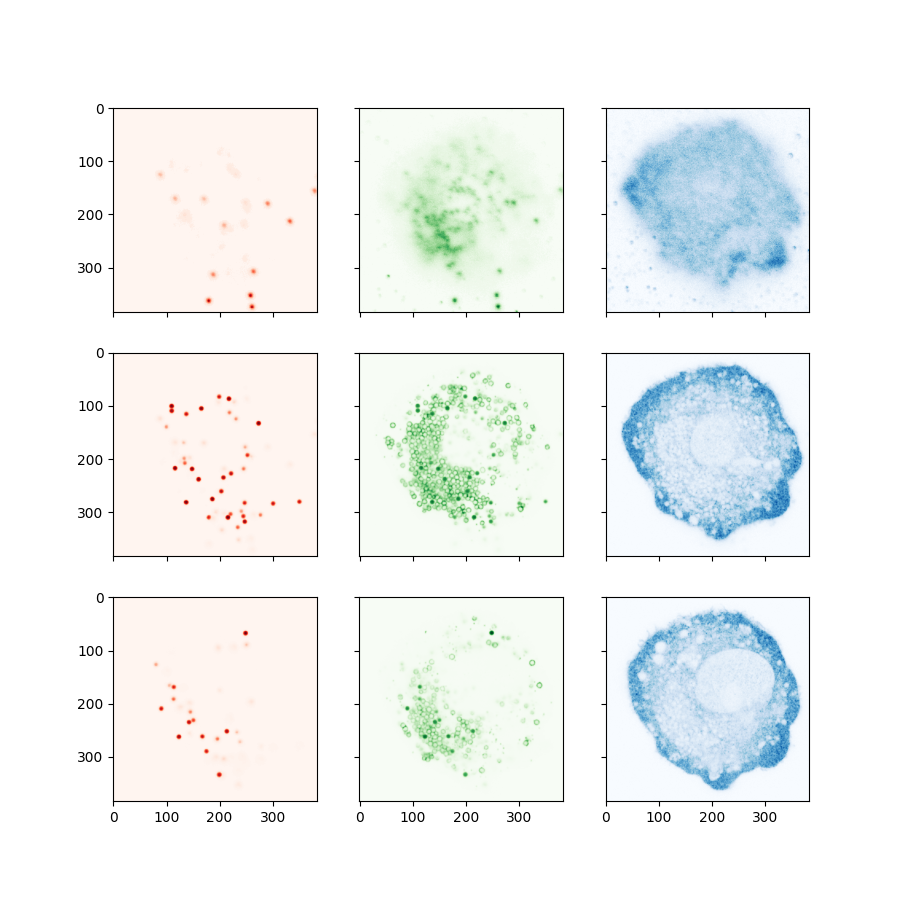

In [7]:
# Visualization of some 2D images using matplotlib colormaps Reds, Greens and Blues

fig, ax = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)
ax[0, 0].imshow(data[ 0, 0, :, :], cmap='Reds')
ax[0, 1].imshow(data[ 0, 1, :, :], cmap='Greens')
ax[0, 2].imshow(data[ 0, 2, :, :], cmap='Blues')
ax[1, 0].imshow(data[ 20, 0, :, :], cmap='Reds')
ax[1, 1].imshow(data[ 20, 1, :, :], cmap='Greens')
ax[1, 2].imshow(data[ 20, 2, :, :], cmap='Blues')
ax[2, 0].imshow(data[ 40, 0, :, :], cmap='Reds')
ax[2, 1].imshow(data[ 40, 1, :, :], cmap='Greens')
ax[2, 2].imshow(data[ 40, 2, :, :], cmap='Blues')

plt.show()

In [8]:
# Data transformation to adapt the data channels to the RGB color sequence  
data_roll = np.roll(data, -1, axis=1)

<IPython.core.display.Javascript object>


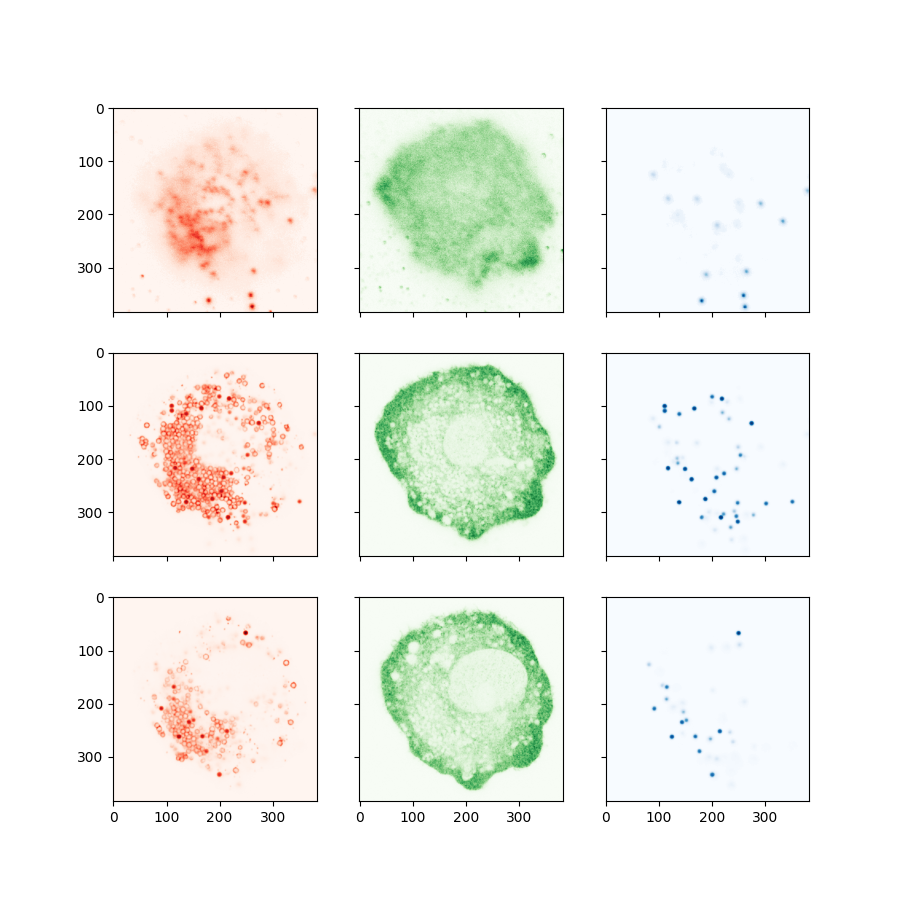

In [9]:
fig, ax = plt.subplots(3, 3, figsize=(9, 9), sharex=True, sharey=True)
ax[0, 0].imshow(data_roll[ 0, 0, :, :], cmap='Reds')
ax[0, 1].imshow(data_roll[ 0, 1, :, :], cmap='Greens')
ax[0, 2].imshow(data_roll[ 0, 2, :, :], cmap='Blues')
ax[1, 0].imshow(data_roll[ 20, 0, :, :], cmap='Reds')
ax[1, 1].imshow(data_roll[ 20, 1, :, :], cmap='Greens')
ax[1, 2].imshow(data_roll[ 20, 2, :, :], cmap='Blues')
ax[2, 0].imshow(data_roll[ 40, 0, :, :], cmap='Reds')
ax[2, 1].imshow(data_roll[ 40, 1, :, :], cmap='Greens')
ax[2, 2].imshow(data_roll[ 40, 2, :, :], cmap='Blues')

plt.show()

In [10]:
# Transform data to be suitable for matplotlib imshow function with RGB images
data_transpose = np.transpose(data_roll, axes=[0, 2, 3, 1])
print(np.shape(data_transpose))

(56, 384, 384, 3)


<IPython.core.display.Javascript object>


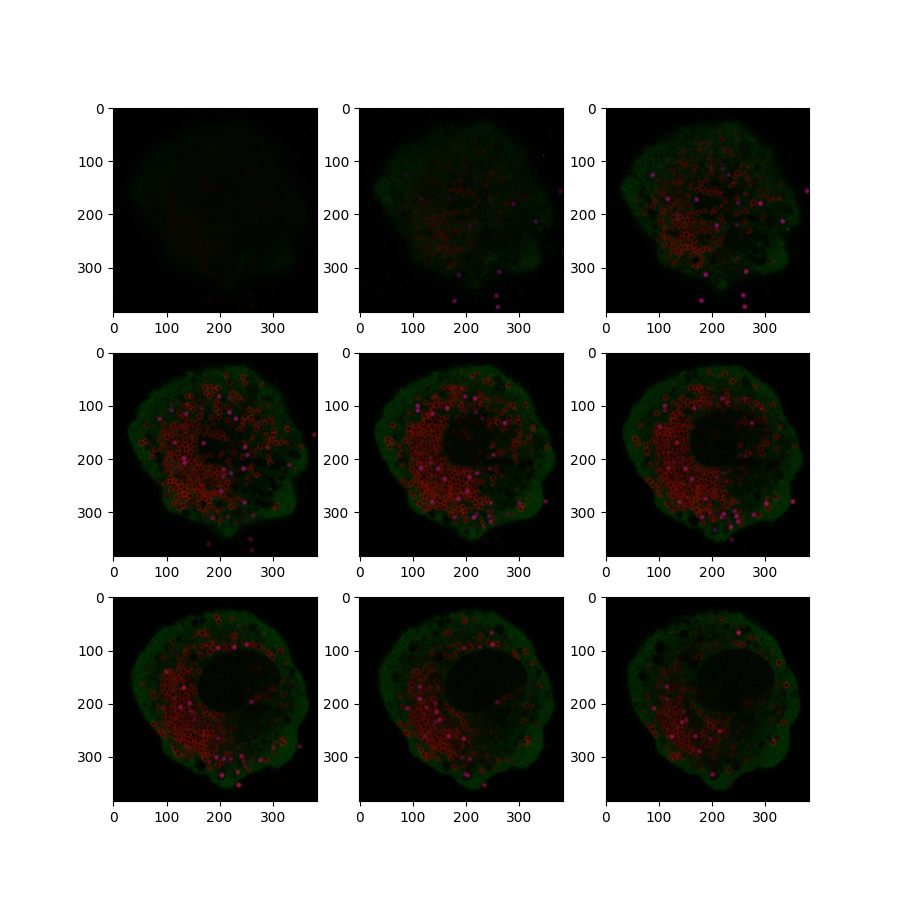

In [11]:
# Visulation of the RBG images for couple of z slices
fig, ax = plt.subplots(3, 3, figsize=(9, 9))
ax[0, 0].imshow(data_transpose[ 0, :, :, :])
ax[0, 1].imshow(data_transpose[ 5, :, :, :])
ax[0, 2].imshow(data_transpose[ 10, :, :, :])
ax[1, 0].imshow(data_transpose[ 15, :, :, :])
ax[1, 1].imshow(data_transpose[ 20, :, :, :])
ax[1, 2].imshow(data_transpose[ 25, :, :, :])
ax[2, 0].imshow(data_transpose[ 30, :, :, :])
ax[2, 1].imshow(data_transpose[ 35, :, :, :])
ax[2, 2].imshow(data_transpose[ 40, :, :, :])

plt.show()

In [12]:
# Boost slightly the contrast --- Warning the transformation here changes the data 
data_normalize = data_transpose.astype('float64')
data_normalize *= 1. / np.max(data_normalize)

<IPython.core.display.Javascript object>


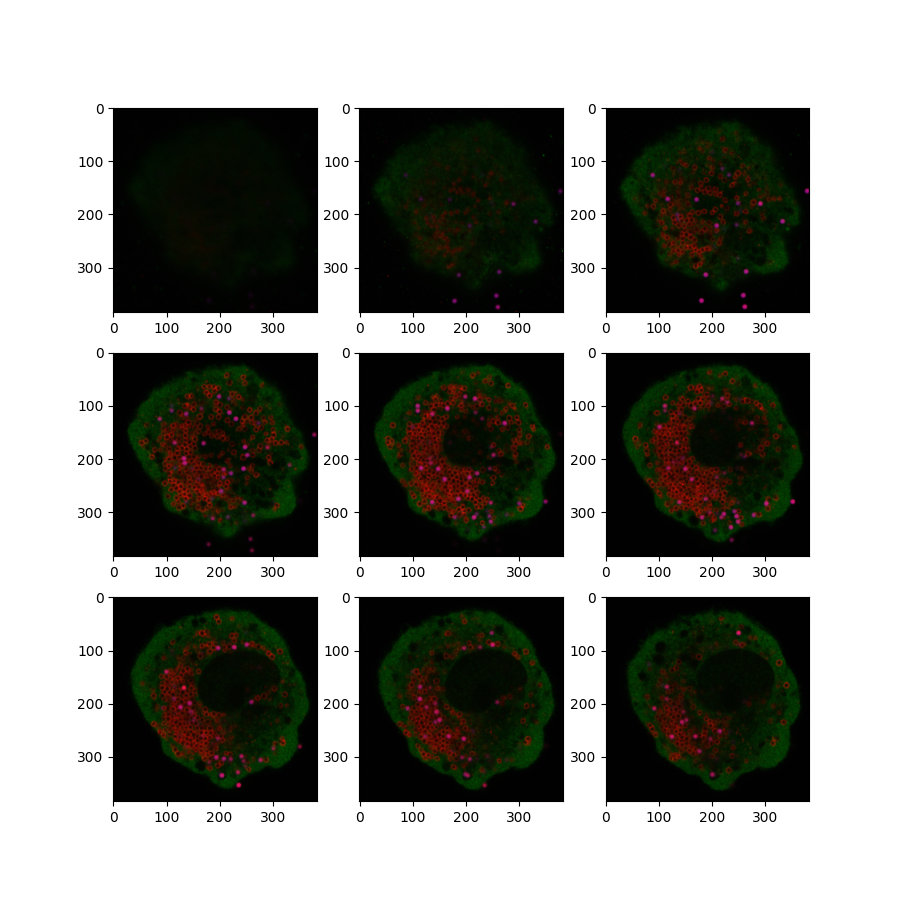

In [13]:
fig, ax = plt.subplots(3, 3, figsize=(9, 9))
ax[0, 0].imshow(data_normalize[ 0, :, :, :])
ax[0, 1].imshow(data_normalize[ 5, :, :, :])
ax[0, 2].imshow(data_normalize[ 10, :, :, :])
ax[1, 0].imshow(data_normalize[ 15, :, :, :])
ax[1, 1].imshow(data_normalize[ 20, :, :, :])
ax[1, 2].imshow(data_normalize[ 25, :, :, :])
ax[2, 0].imshow(data_normalize[ 30, :, :, :])
ax[2, 1].imshow(data_normalize[ 35, :, :, :])
ax[2, 2].imshow(data_normalize[ 40, :, :, :])

plt.show()

<IPython.core.display.Javascript object>


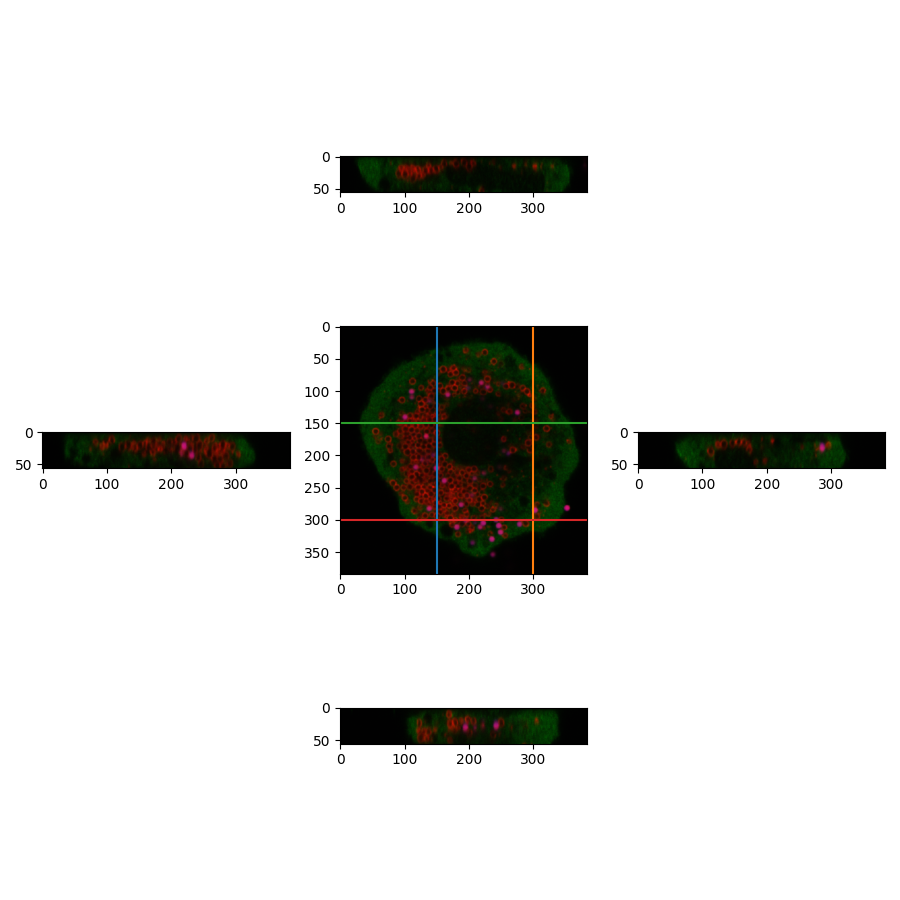

In [14]:
# Example of orthoslices using matplotlib

fig, ax = plt.subplots(3, 3, figsize=(9, 9))

ax[1, 0].imshow(data_normalize[:, :, 150, :])
ax[1, 1].imshow(data_normalize[25, :, :, :])
ax[1, 1].plot(150 * np.ones((384)), np.linspace(0, 383, 384))
ax[1, 1].plot(300 * np.ones((384)), np.linspace(0, 383, 384))
ax[1, 1].plot(np.linspace(0, 383, 384), 150 * np.ones((384)))
ax[1, 1].plot(np.linspace(0, 383, 384), 300 * np.ones((384)))
ax[1, 2].imshow(data_normalize[:, :, 300, :])
ax[0, 1].imshow(data_normalize[:, 150, :, :])
ax[2, 1].imshow(data_normalize[:, 300, :, :])

ax[0, 0].axis('off')
ax[0, 2].axis('off')
ax[2, 0].axis('off')
ax[2, 2].axis('off')

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


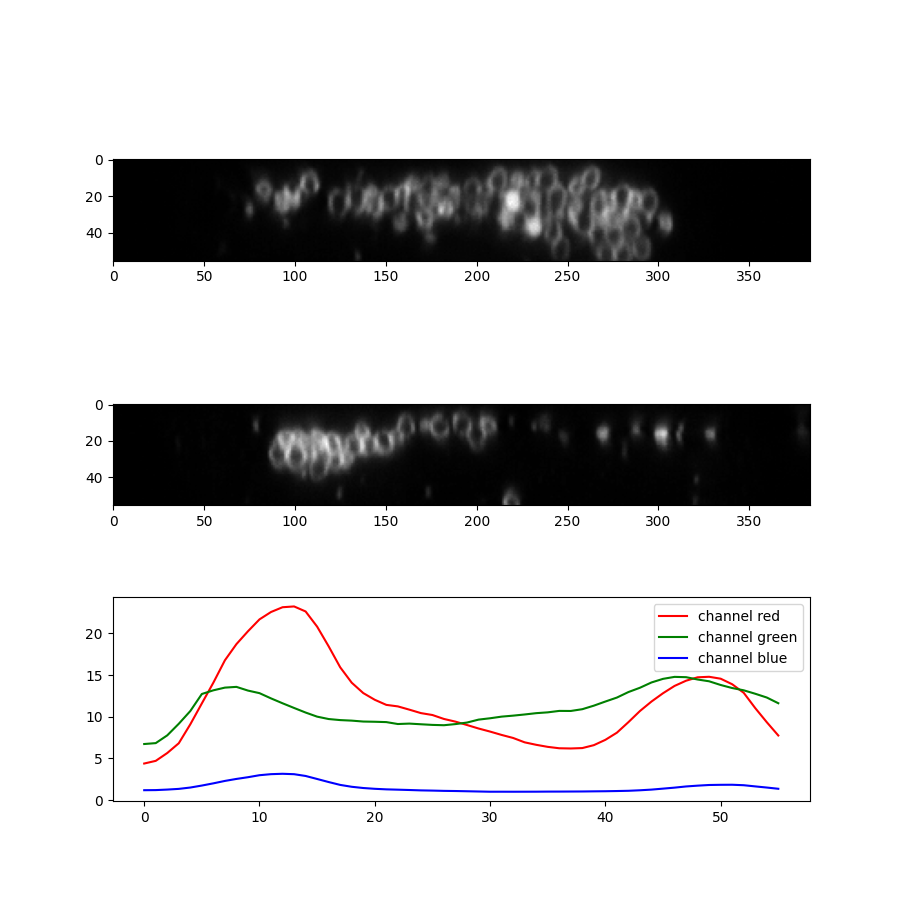

In [15]:
# Example of custom data visualization

fig, ax = plt.subplots(3, 1, figsize=(9, 9))
ax[0].imshow(data_roll[ :, 0, :, 150], cmap='gray')
ax[1].imshow(data_roll[ :, 0, 150, :], cmap='gray')

ax[2].plot(np.average(data_roll[:, :, 150:200, 150:200], axis=(2, 3))[:, 0], color='red', label='channel red')
ax[2].plot(np.average(data_roll[:, :, 150:200, 150:200], axis=(2, 3))[:, 1], color='green', label='channel green')
ax[2].plot(np.average(data_roll[:, :, 150:200, 150:200], axis=(2, 3))[:, 2], color='blue', label='channel blue')

ax[2].legend()

plt.show()

### Example of feature extraction in multidimensional data

Threshold particles along blue axis of the rolled data, group them along the stack, and visualize them in 3D

<IPython.core.display.Javascript object>


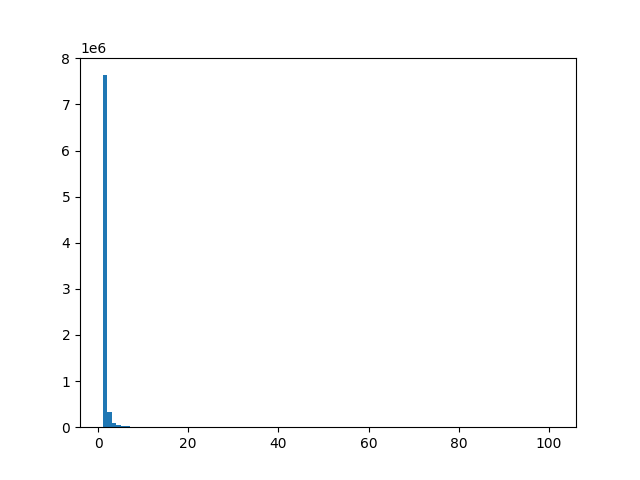

In [16]:
# Histogram plot along the proper channel to determine the threshold
fig, ax = plt.subplots()
ax.hist(data_roll[:, 2, :, :].ravel(), bins=100)

plt.show()

In [17]:
# Threshold the multidimensional data
data_threshold = data_roll[:, 2, :, :] > 60
print(np.shape(data_threshold))

(56, 384, 384)


<IPython.core.display.Javascript object>


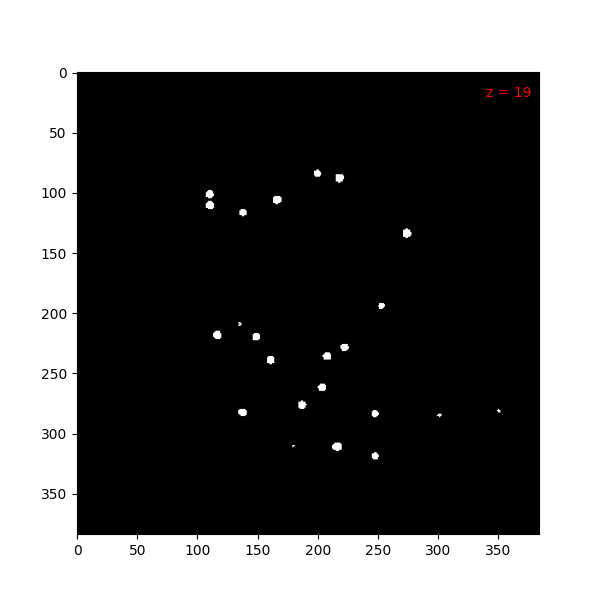

In [56]:
# Animation/movie of the thresholded data along z-stack
fig, ax = plt.subplots(figsize=(6, 6))

frames = []
for i, array in enumerate(data_threshold):
    frames.append([ax.imshow(array, cmap='gray', animated=True), ax.annotate('z = ' + str(i), (340, 20), color='red')])

ani = animation.ArtistAnimation(fig, frames, interval=200, blit=True, repeat_delay=200)

plt.show()

In [19]:
# Export animation in .gif format

metadata_animation=dict(title='Blob_threshold_zstack', artist='CCEM/CALM')
writergif = animation.PillowWriter(fps=20, metadata=metadata_animation)
ani.save('Blob_threshold_zstack.gif', writer=writergif, dpi=120)

In [20]:
# Label each separated particles
data_label = measure.label(data_threshold)
print(np.max(data_label))
print(np.shape(data_label))

73
(56, 384, 384)


<IPython.core.display.Javascript object>


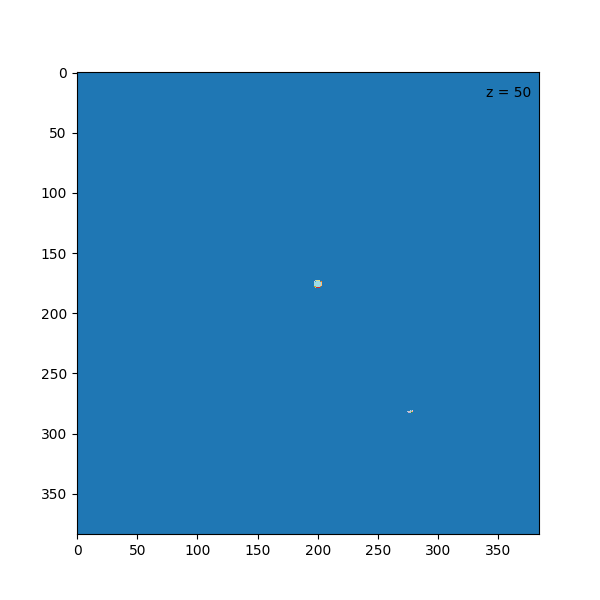

In [61]:
# Animation of the labeled data along z-stack

fig, ax = plt.subplots(figsize=(6, 6))

frames = []
for i, array in enumerate(data_label):
    frames.append([ax.imshow(array, cmap='tab20', clim=(0, 73), animated=True), ax.annotate('z = ' + str(i), (340, 20))])

ani = animation.ArtistAnimation(fig, frames, interval=200, blit=True, repeat_delay=200)

plt.show()

In [23]:
# Extract the contours of each particles

contours_label = {} # dictionnary

for label in range(1, 74):
    contours_label[label] = np.empty((0, 3))
    for z in range (0, 56):
        contour = measure.find_contours(data_label[z,:,:]==label, level=0.9)
        if len(contour) != 0:
            contour = np.vstack(contour)
            k = z * np.ones((np.shape(contour)[0], 1))
            contour = np.hstack((contour, k))
            contours_label[label] = np.append(contours_label[label], contour, axis=0)

<IPython.core.display.Javascript object>


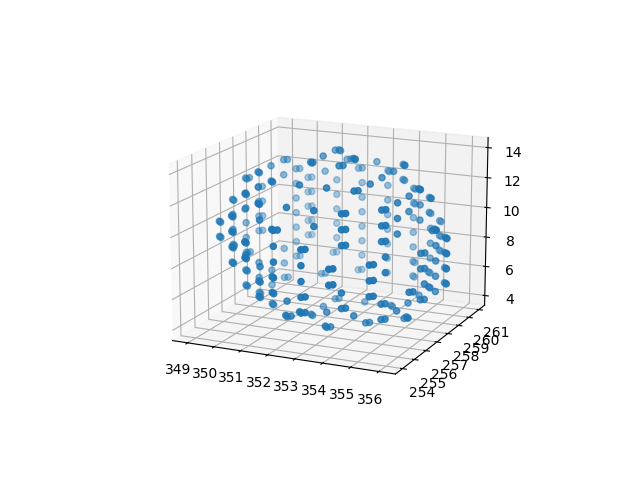

In [40]:
# Plot the contour in three dimensions of the particle labelled 1

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(contours_label[1][:, 0], contours_label[1][:, 1], contours_label[1][:, 2])

plt.show()

<IPython.core.display.Javascript object>


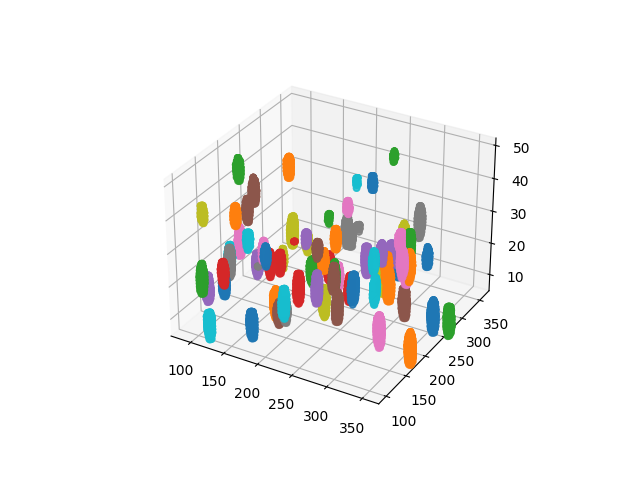

In [43]:
# Plot the contour in three dimensions of all particles

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

for i in range(1, 74):
    ax.scatter(contours_label[i][:, 0], contours_label[i][:,1], contours_label[i][:,2])

#ax.set_box_aspect((384/56, 384/56, 1)) # to scale the 3D space

plt.show()

<IPython.core.display.Javascript object>


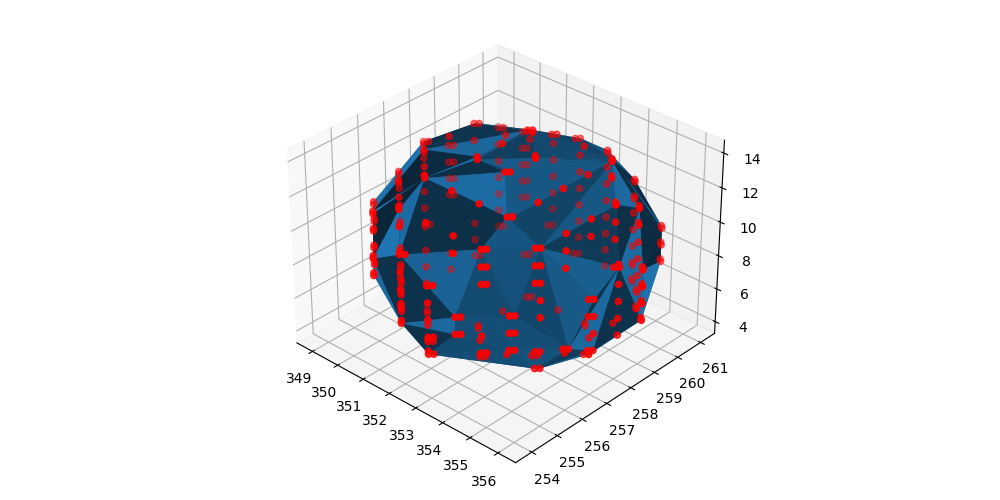

In [50]:
# One example to fill the space between points by making a surface between three adjacent points (trisurf) for the first particle

# Import additional libraries
from matplotlib.tri import triangulation
from scipy.spatial import ConvexHull

contours_label_copy = contours_label.copy() # Creating a copy of the data for safety


fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')


cvx = ConvexHull(contours_label_copy[1])
x, y, z = contours_label_copy[1].T
tri = triangulation.Triangulation(x, y, triangles=cvx.simplices)
ax.plot_trisurf(tri, z, alpha=1)

ax.scatter(contours_label[1][:, 0], contours_label[1][:,1], contours_label[1][:,2], color='red') # Just to show the points from the contour 

#ax.set_box_aspect((384/56, 384/56, 1)) # to scale the 3D space

fig.tight_layout()

plt.show()

<IPython.core.display.Javascript object>


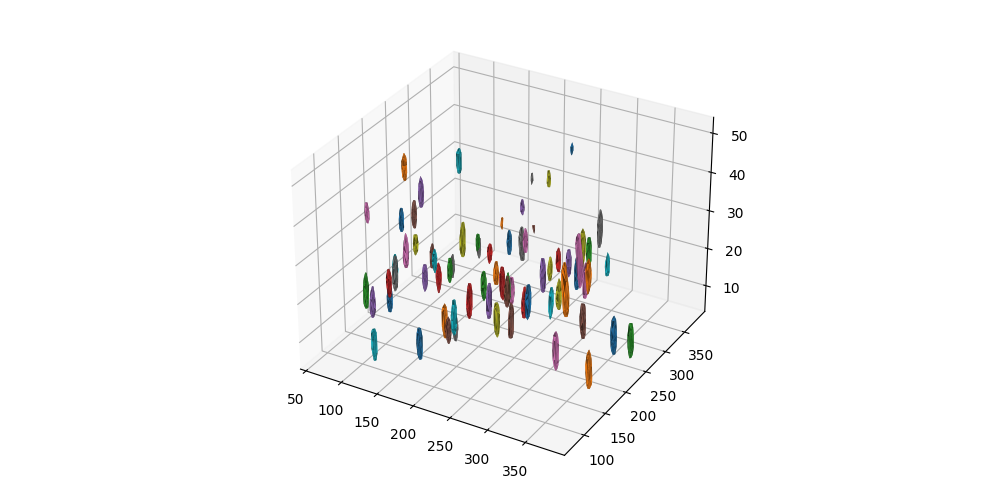

In [58]:
# Same plot for all particles (except label 48 and 64 showing particular problems)

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(projection='3d')

for label in range(1, 74):
    if label != 48 and label !=64: #Two areas are causing problems, so there are removed
        cvx = ConvexHull(contours_label_copy[label])
        x, y, z = contours_label_copy[label].T
        tri = triangulation.Triangulation(x, y, triangles=cvx.simplices)
        ax.plot_trisurf(tri, z)
    
# ax.set_box_aspect((384/56, 384/56, 1)) # to scale the 3D space

fig.tight_layout()

plt.show()